<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

import fun_CondProb as fn

<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 run</span> 
    

In [2]:
ssp='ssp585'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
path = f'/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Bayesian Paper Figure list
</span>
<br><br><br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    2050 NYC projections conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: red;">
    <li>2030 RSL observations</li>
    <li>2030 GMSL observations</li>
    <li>2030 Sterodynamic observations</li>
    <li>2030 AIS observation</li>
</ol>

In [3]:
ssps = ['ssp119', 'ssp126','ssp245','ssp370', 'ssp585']
#
station=0; 
#
start_year=2020; end_year=2100; unit='cm'; 
#
# Base path of data folder (all ssp).
base_path = '/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1'
#
# Dictionary of filenames
file_names = {
    'GMSL__wf1f': 'total.workflow.wf1f.global.nc',                          'NYC-MSL__wf1f': 'total.workflow.wf1f.local.nc',
    'AIS_ar5_global': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc',           'AIS_ar5_local': 'ar5AIS.ipccar5.icesheets_AIS_globalsl.nc', 

    'GMSL__wf2f': 'total.workflow.wf2f.global.nc',                          'NYC-MSL__wf2f': 'total.workflow.wf2f.local.nc',
    'AIS_larmip_global' : 'larmip.larmip.AIS_globalsl.nc',                  'AIS_larmip_local' : 'larmip.larmip.AIS_localsl.nc',

    'GMSL__wf3f': 'total.workflow.wf3f.global.nc',                          'NYC-MSL__wf3f': 'total.workflow.wf3f.local.nc',
    'AIS_d21_global' : 'deconto21.deconto21.AIS_AIS_globalsl.nc',           'AIS_d21_local' : 'deconto21.deconto21.AIS_AIS_localsl.nc',

    'GMSL__wf4': 'total.workflow.wf4.global.nc',                            'NYC-MSL__wf4': 'total.workflow.wf4.local.nc',
    'AIS_b19_global' : 'bamber19.bamber19.icesheets_AIS_globalsl.nc',       'AIS_b19_local' : 'bamber19.bamber19.icesheets_AIS_localsl.nc',
    
    
    'TE'  : 'ocean.tlm.sterodynamics_globalsl.nc',                          'SD'  : 'ocean.tlm.sterodynamics_localsl.nc', 
}
#
# Dictionary to store the results
all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path, 'filename': filename}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names, filename

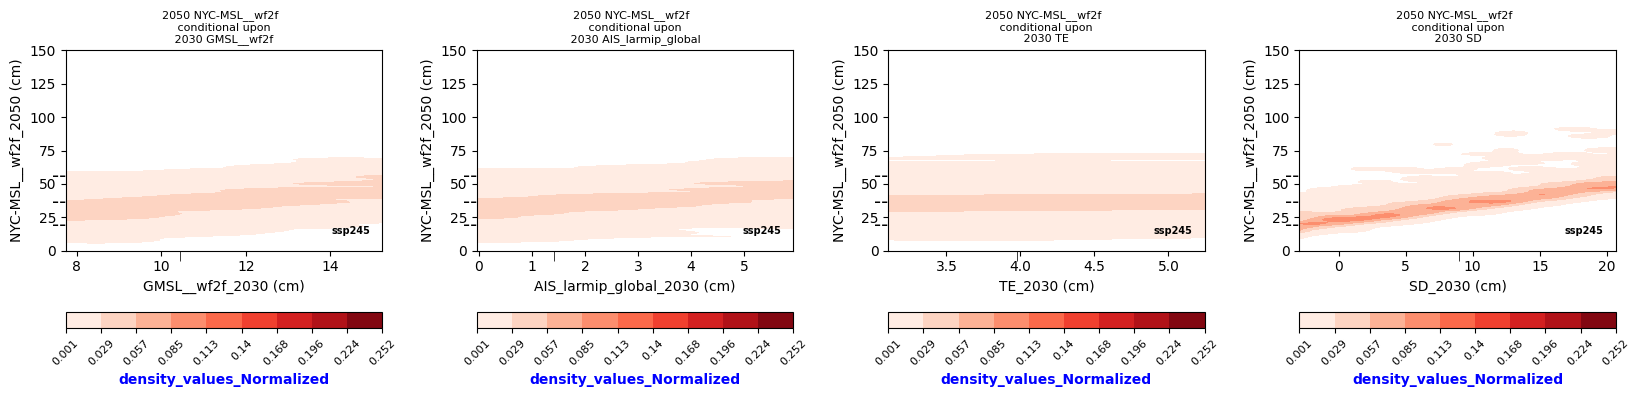

In [4]:
plot_params = {
    0: {'var1': all_ssp['GMSL__wf2f'], 't1': 2030,           'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2050},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2030,        'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2050},
    2: {'var1': all_ssp['TE'], 't1': 2030,              'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2050},
    3: {'var1': all_ssp['SD'], 't1': 2030,                      'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2050}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Reds'}

# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()


<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: none; border-style: dotted;">
    <br>2100
</div>

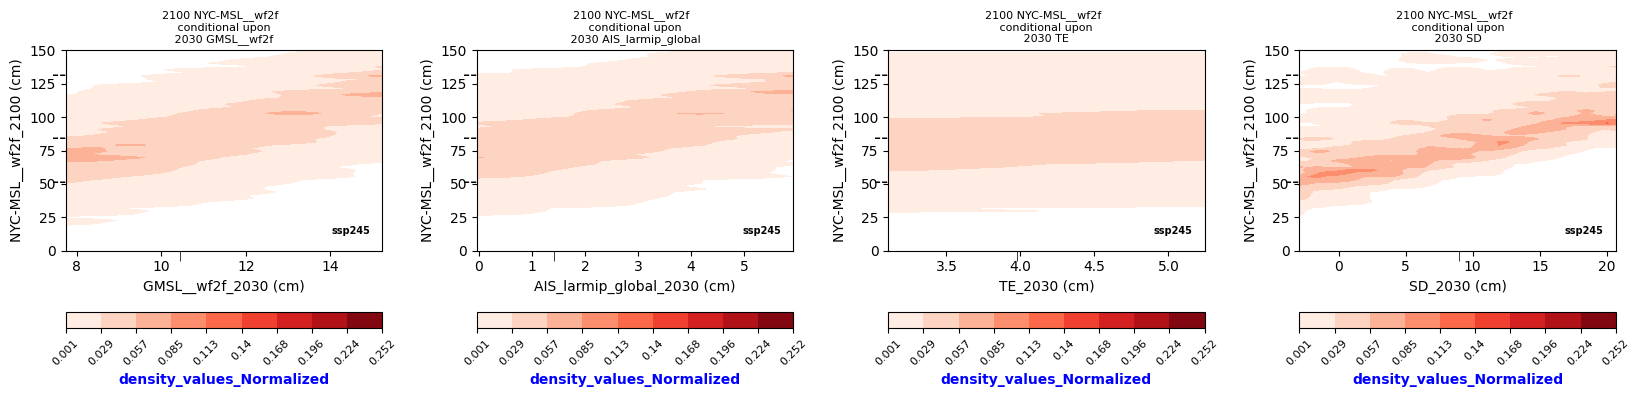

In [5]:
plot_params = {
    0: {'var1': all_ssp['GMSL__wf2f'], 't1': 2030,           'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2030,        'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    2: {'var1': all_ssp['TE'], 't1': 2030,              'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    3: {'var1': all_ssp['SD'], 't1': 2030,                      'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Reds'}


# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: red;"> 2100 :: 2050   <b> .</b></span>

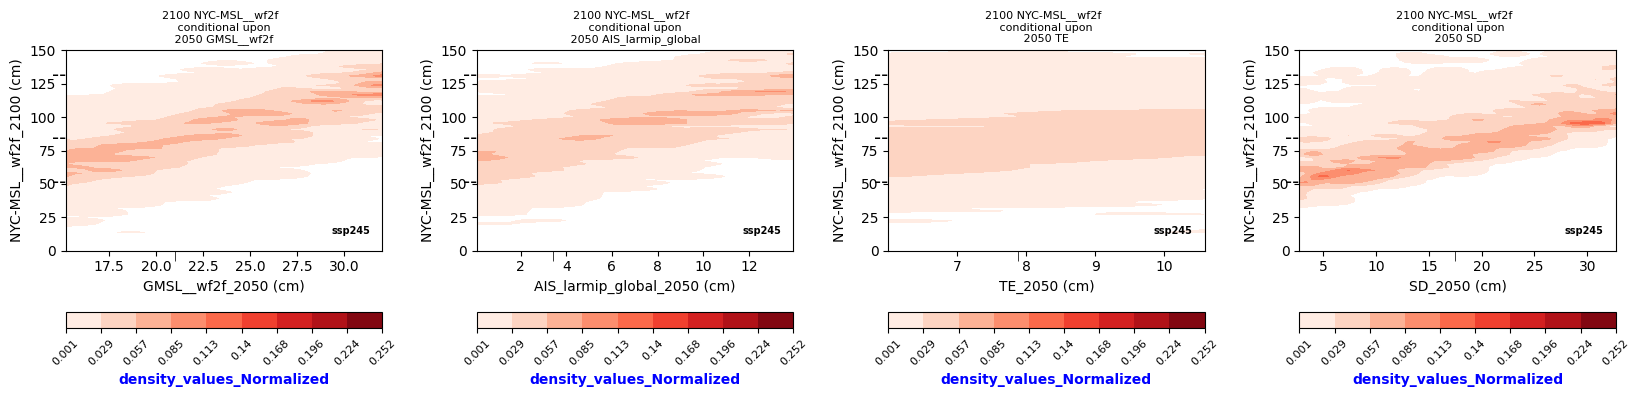

In [6]:
plot_params = {
    0: {'var1': all_ssp['GMSL__wf2f'], 't1': 2050,           'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2050,        'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    2: {'var1': all_ssp['TE'], 't1': 2050,              'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100},
    3: {'var1': all_ssp['SD'], 't1': 2050,                      'var2': all_ssp['NYC-MSL__wf2f'], 't2': 2100}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Reds'}

# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()

<hr style="border: none; height: 2px; background-color: black; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    2050 NYC projections conditional on
</span>
<ol style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    <li>2030 AIS ar5    <b>global</b> observations</li>
    <li>2030 AIS larmp  <b>global</b> observations</li>
    <li>2030 AIS d21    <b>global</b> observations</li>
    <li>2030 AIS b19    <b>global</b> observation</li>
</ol>

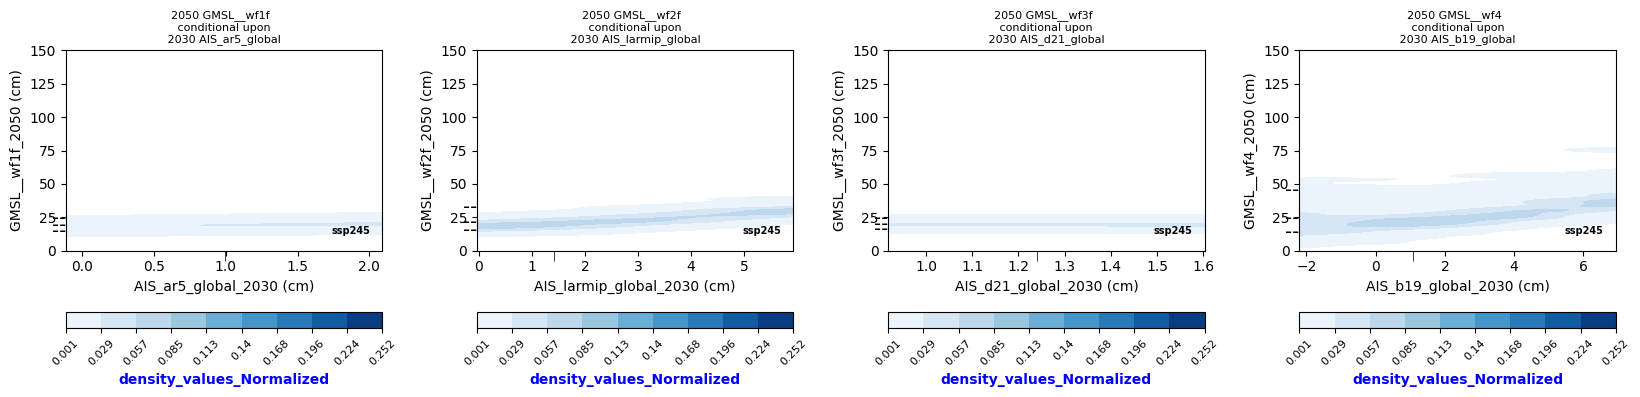

In [7]:
plot_params = {
    0: {'var1': all_ssp['AIS_ar5_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf1f'], 't2': 2050},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2030,        'var2': all_ssp['GMSL__wf2f'], 't2': 2050},
    2: {'var1': all_ssp['AIS_d21_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf3f'], 't2': 2050},
    3: {'var1': all_ssp['AIS_b19_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf4'], 't2': 2050}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Blues'}

# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()


<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: none; border-style: dotted;">
    <br>2100
</div>

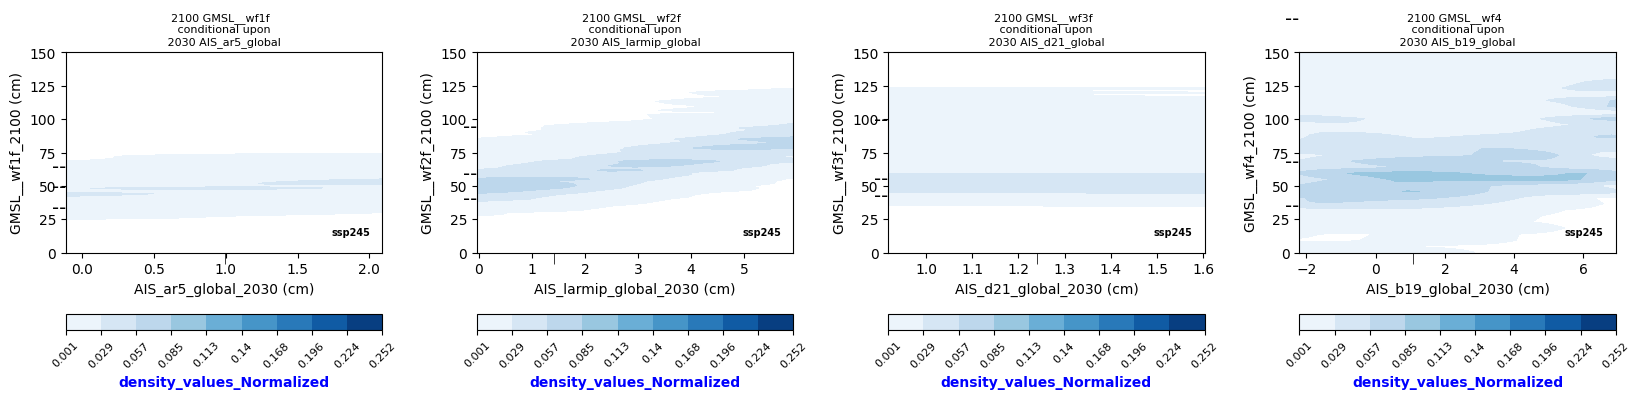

In [8]:
plot_params = {
    0: {'var1': all_ssp['AIS_ar5_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf1f'], 't2': 2100},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2030,        'var2': all_ssp['GMSL__wf2f'], 't2': 2100},
    2: {'var1': all_ssp['AIS_d21_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf3f'], 't2': 2100},
    3: {'var1': all_ssp['AIS_b19_global'], 't1': 2030,           'var2': all_ssp['GMSL__wf4'], 't2': 2100}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Blues'}

# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()


<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: red;"> 2100 :: 2050   <b> .</b></span>

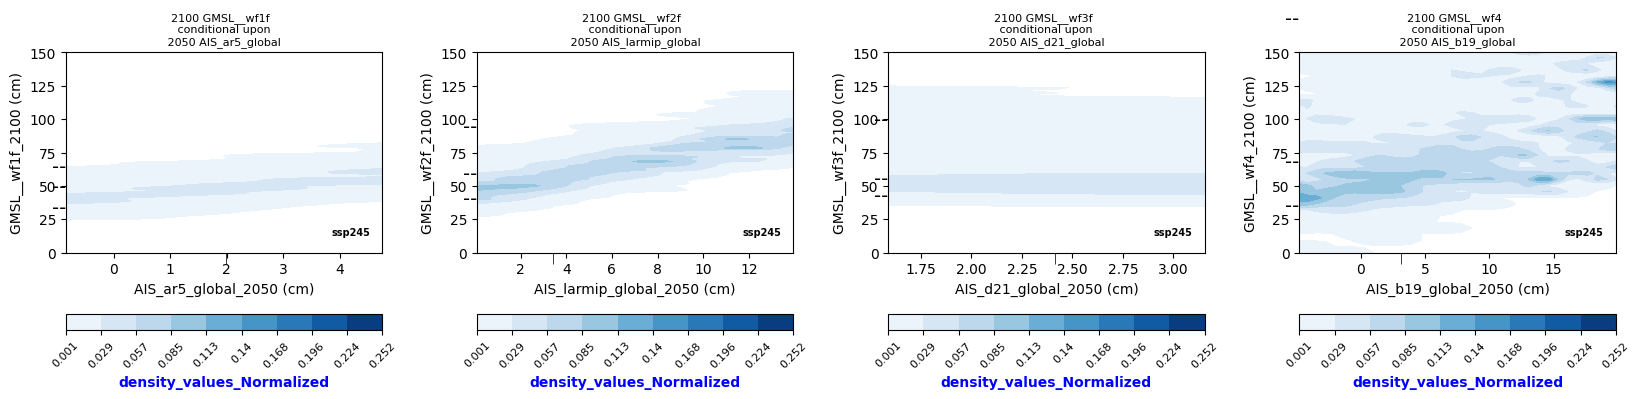

In [9]:
plot_params = {
    0: {'var1': all_ssp['AIS_ar5_global'], 't1': 2050,           'var2': all_ssp['GMSL__wf1f'], 't2': 2100},
    1: {'var1': all_ssp['AIS_larmip_global'], 't1': 2050,        'var2': all_ssp['GMSL__wf2f'], 't2': 2100},
    2: {'var1': all_ssp['AIS_d21_global'], 't1': 2050,           'var2': all_ssp['GMSL__wf3f'], 't2': 2100},
    3: {'var1': all_ssp['AIS_b19_global'], 't1': 2050,           'var2': all_ssp['GMSL__wf4'], 't2': 2100}
}

# Set up the figure and axes for 2-panel subplot
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)

plotOPT = {'y_ax_min':0, 'y_ax_max': 150, 'c_bar_min': 0.001, 'c_bar_max': 0.252, 'plotCBAR' : 'YES', 'cmap' : 'Blues'}

# Loop through the dictionary and plot
for i, params in plot_params.items():
    # AXIS-LABELS
    var1_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var1']))
    var2_lab = next(key for key, val in all_ssp.items() if np.array_equal(val, params['var2']))
    fn.plot_ConditionalProb(ax[i], params['var1'], params['var2'], params['t1'], params['t2'],var1_lab,var2_lab,plotOPT)

plt.show()
